<a href="https://colab.research.google.com/github/lucasagostinhok/Torre-de-Hanoi/blob/main/Torre_de_Hanoi_Aula_Sexta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar matplotlib (se necessário)
!pip install matplotlib

Digite o número de discos: 5
Digite a torre de origem (A, B ou C): a
Digite a torre de destino (A, B ou C): c
Resolvendo Torre de Hanoi com 5 discos:


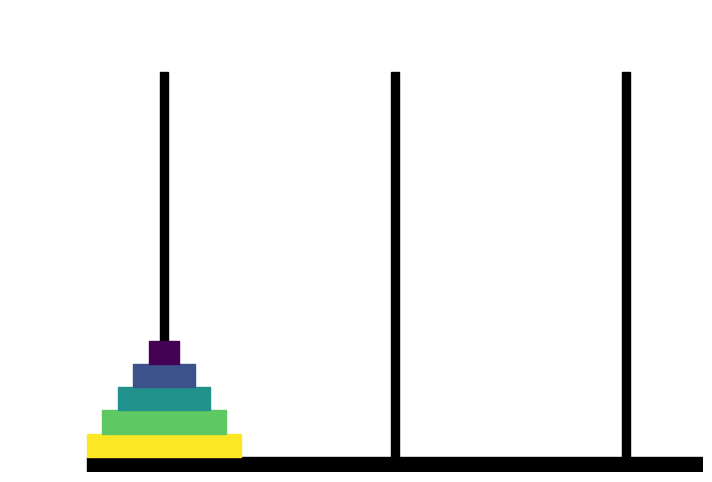

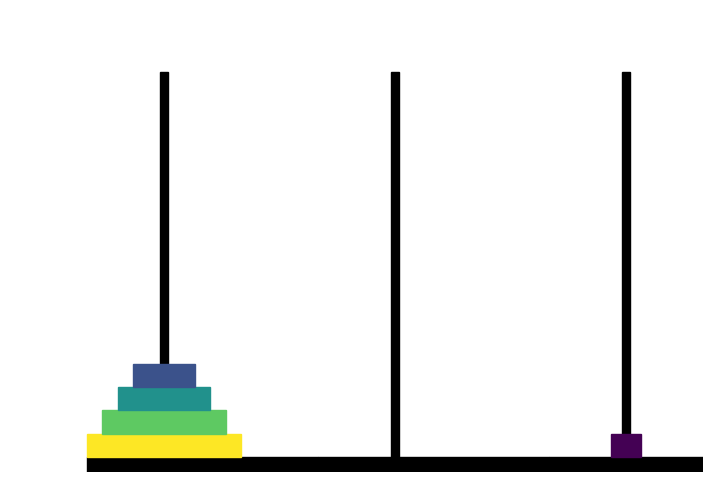

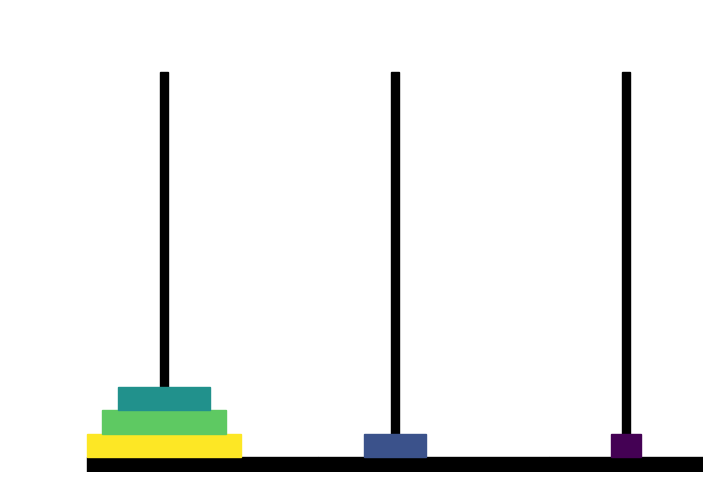

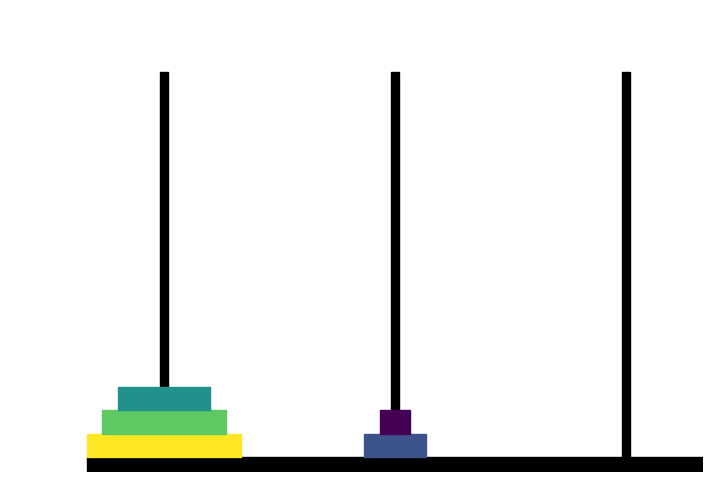

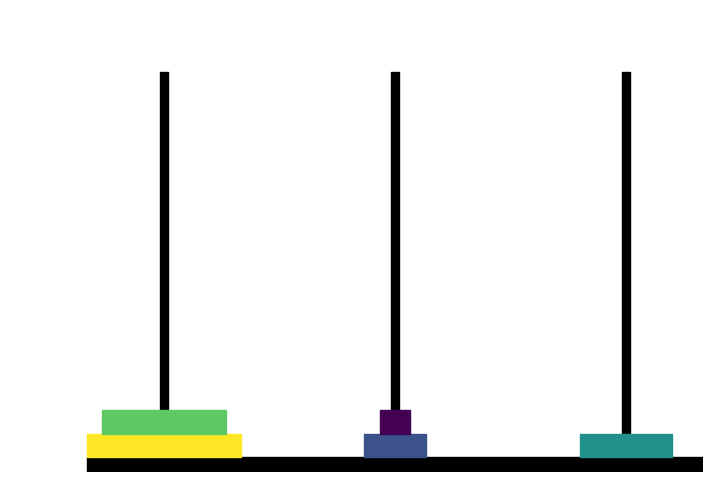

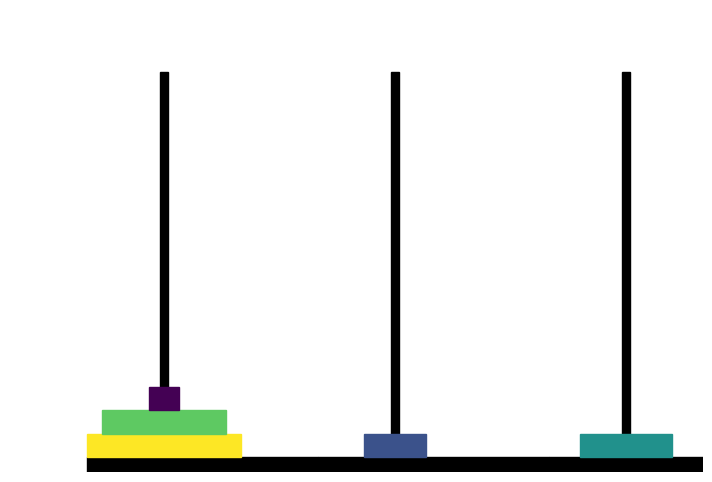

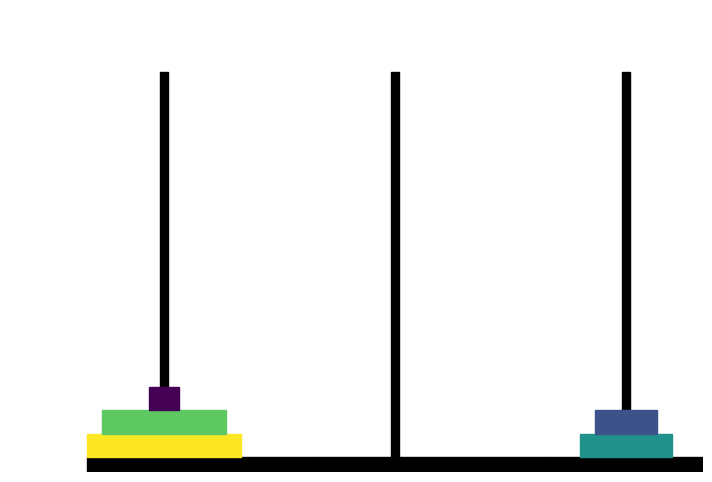

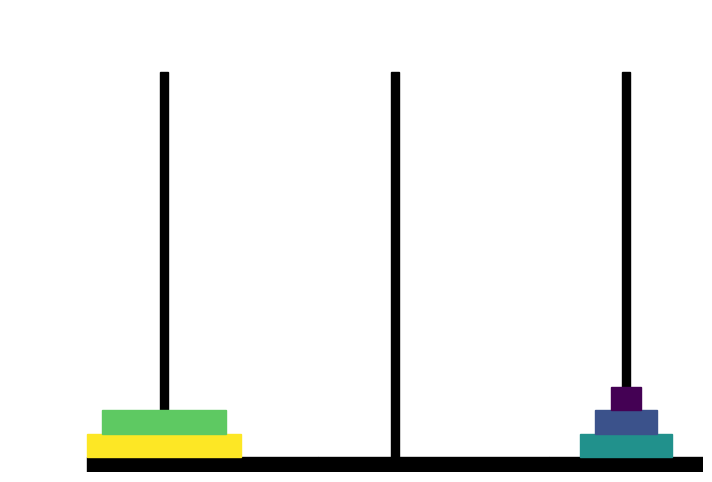

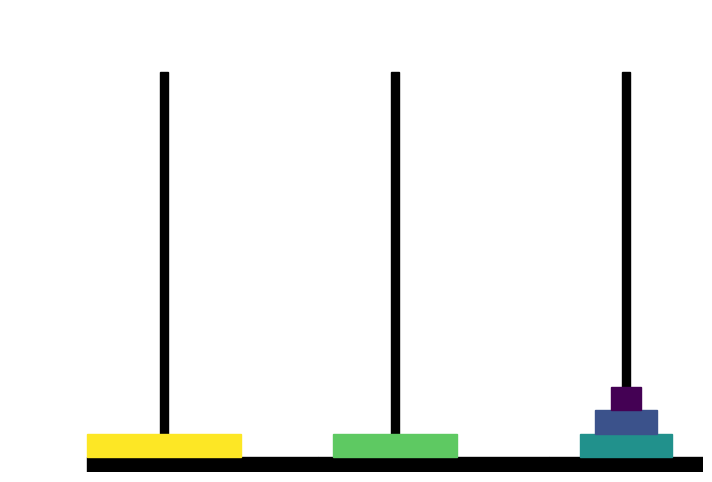

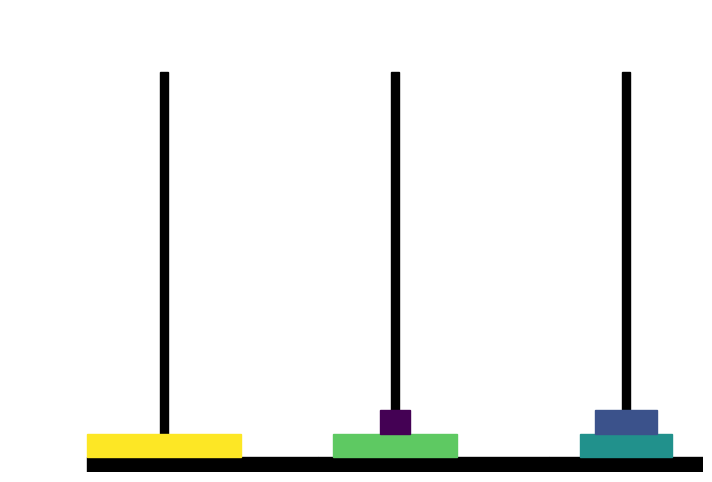

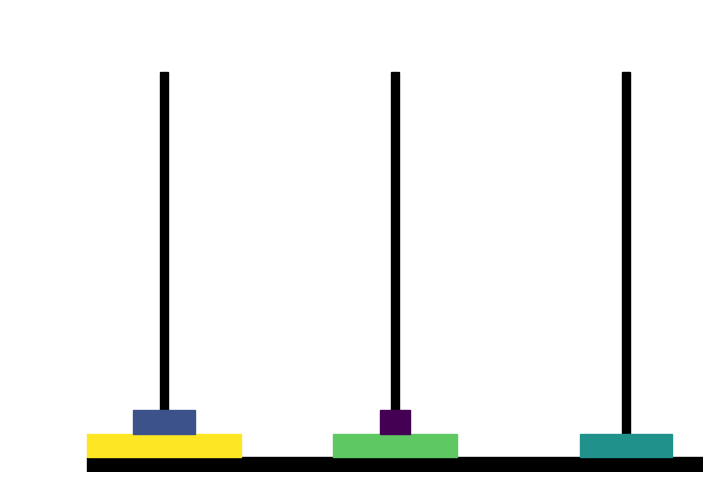

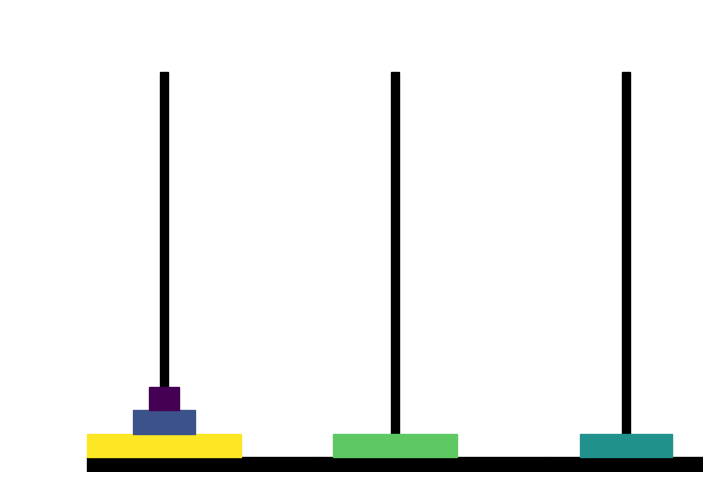

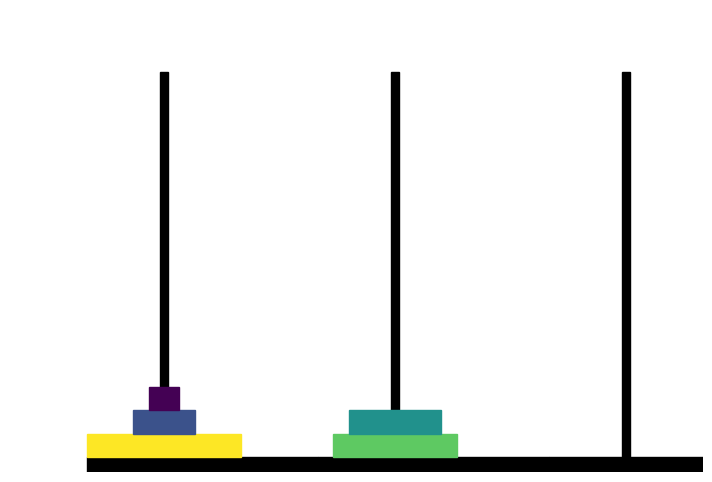

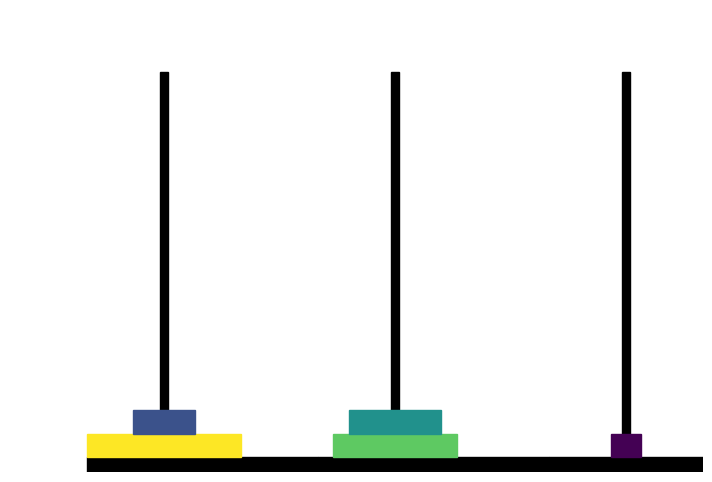

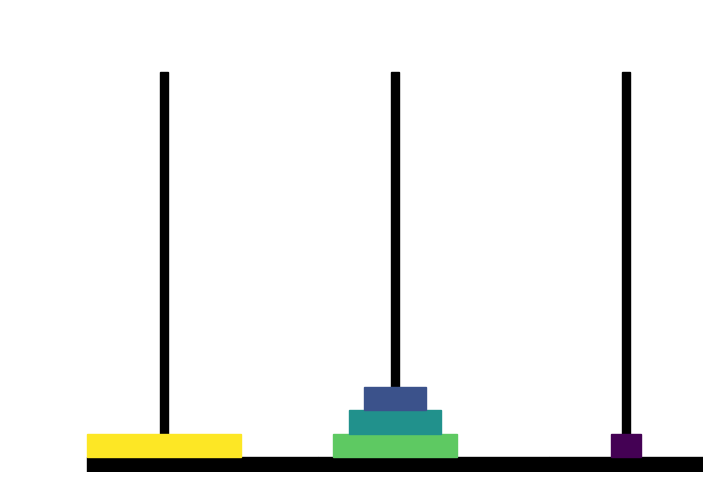

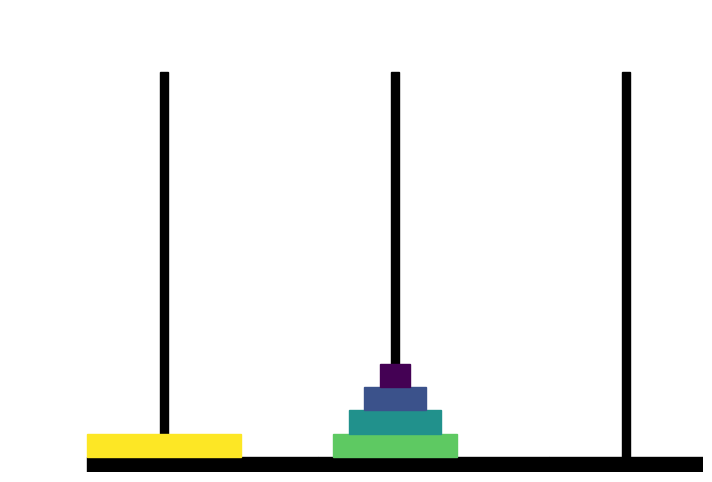

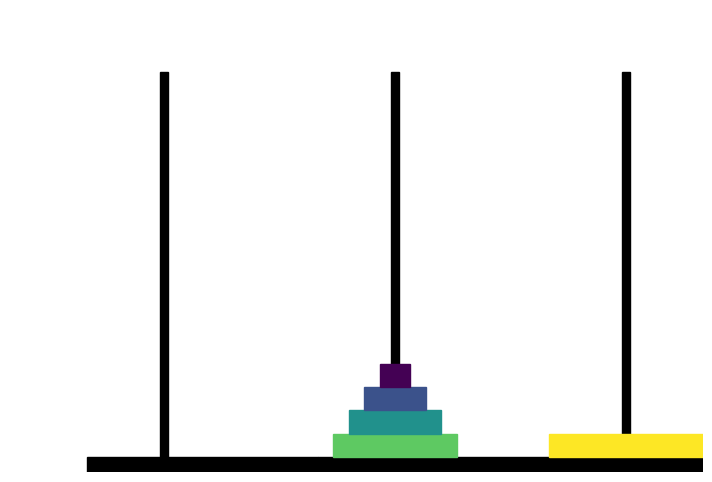

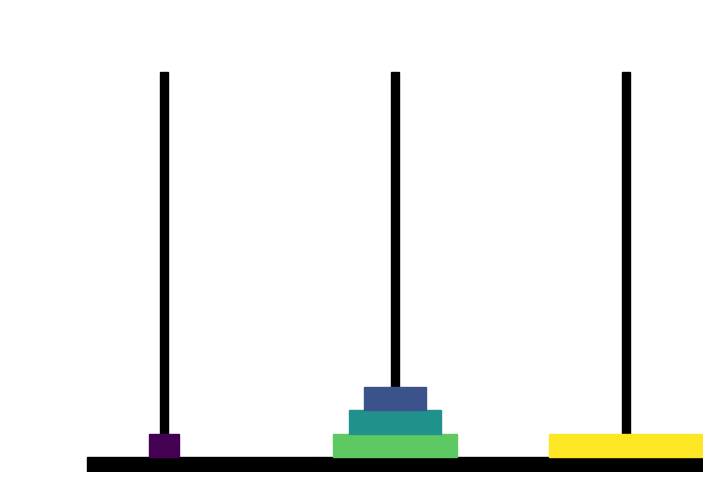

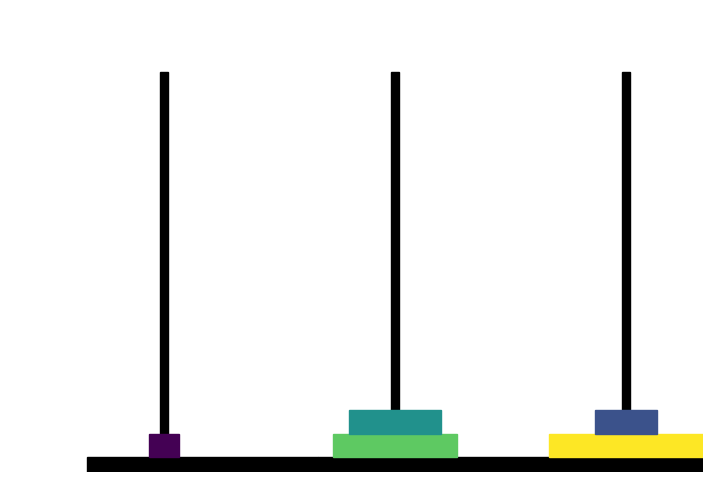

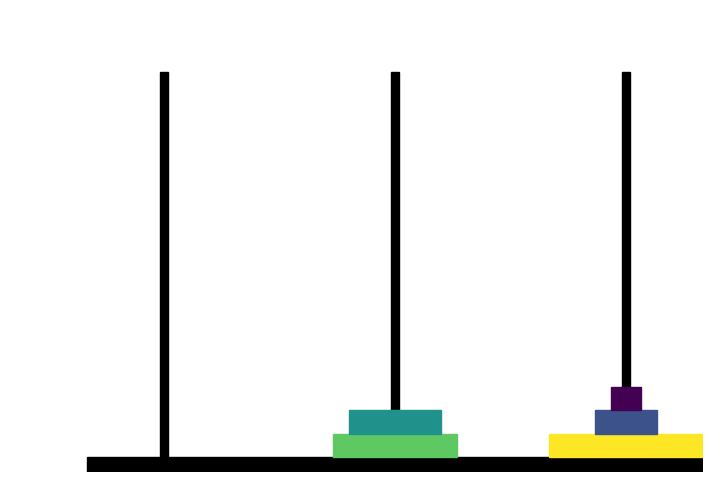

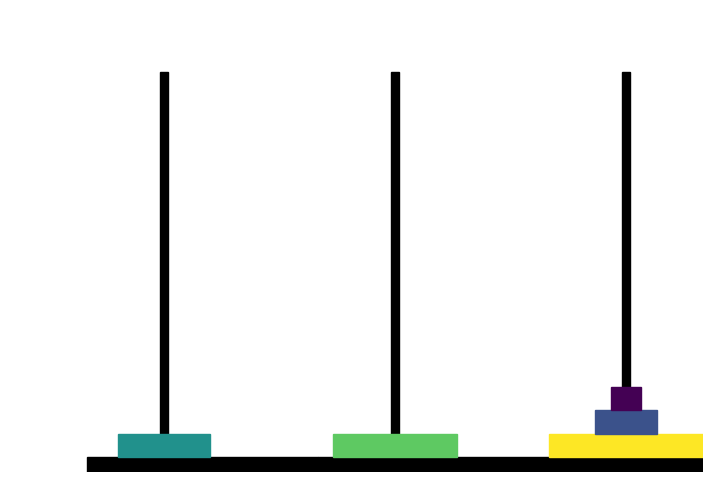

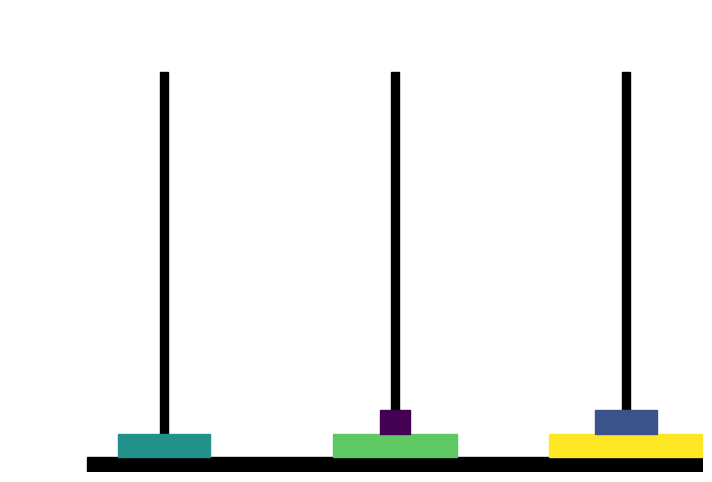

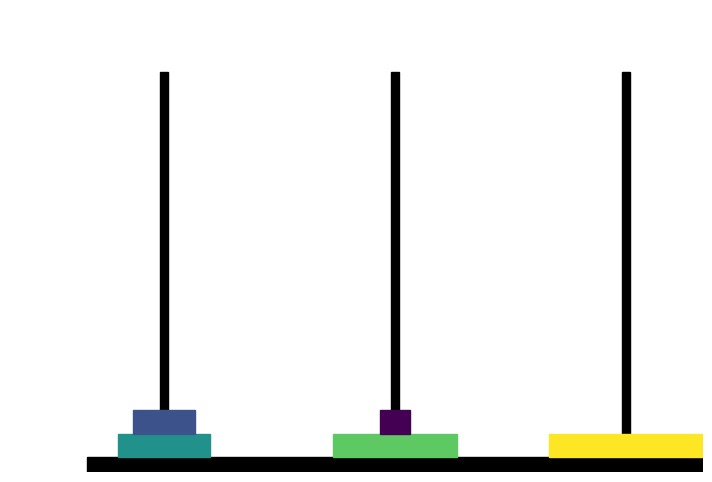

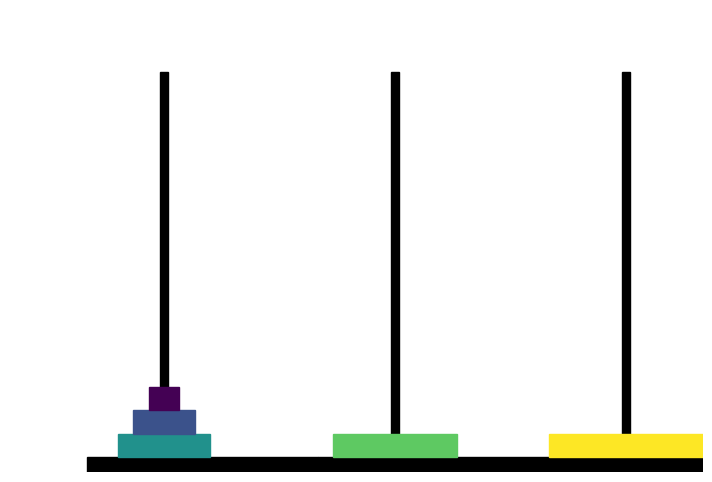

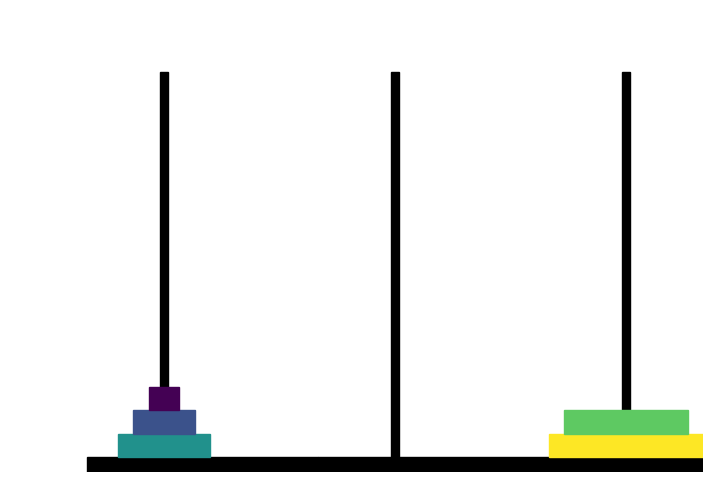

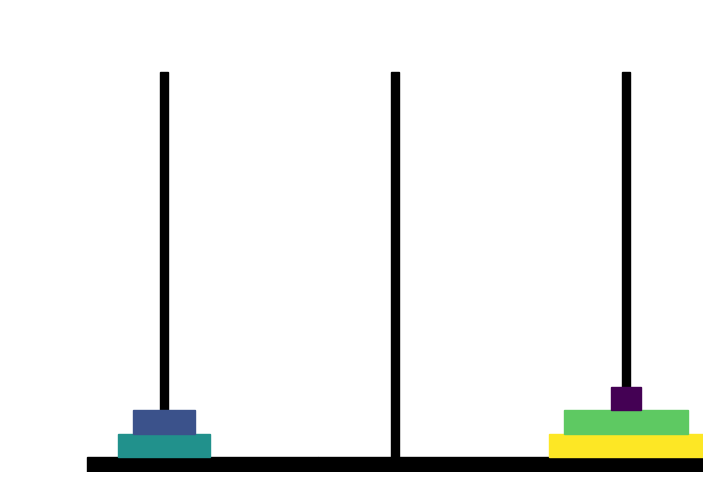

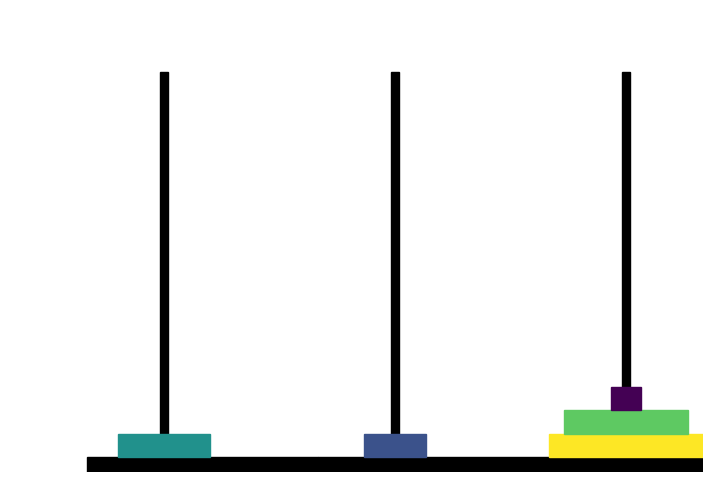

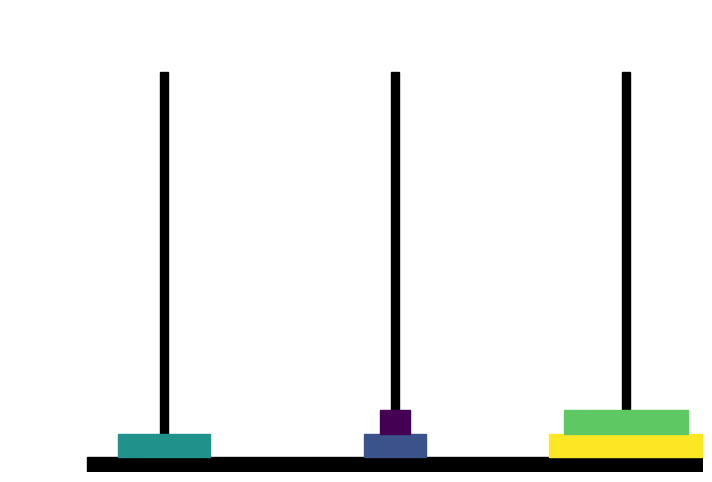

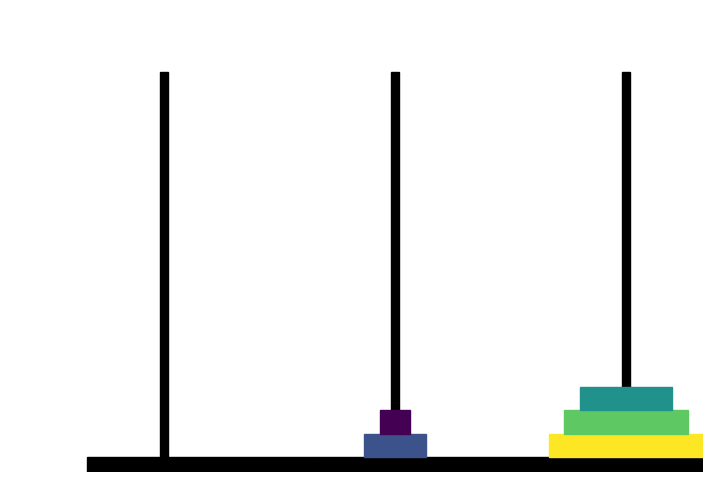

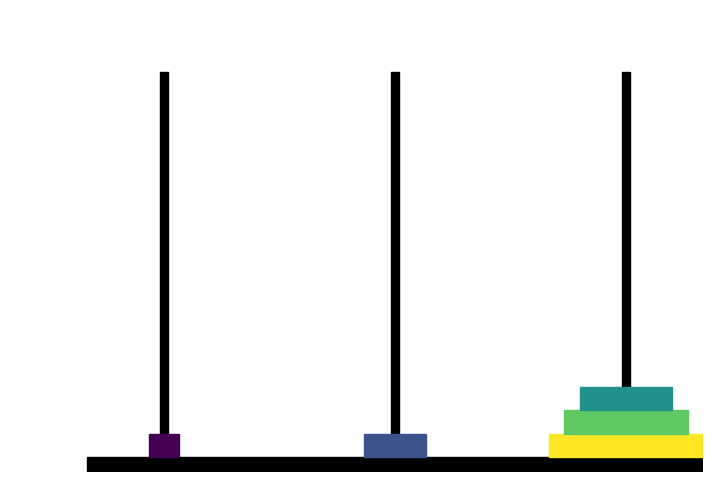

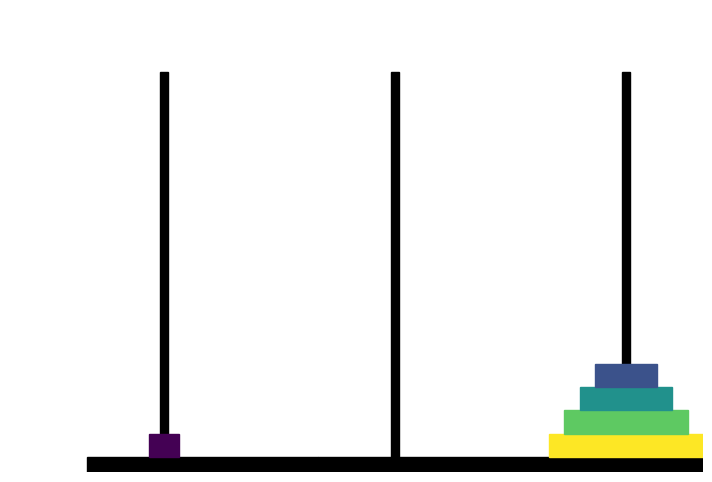

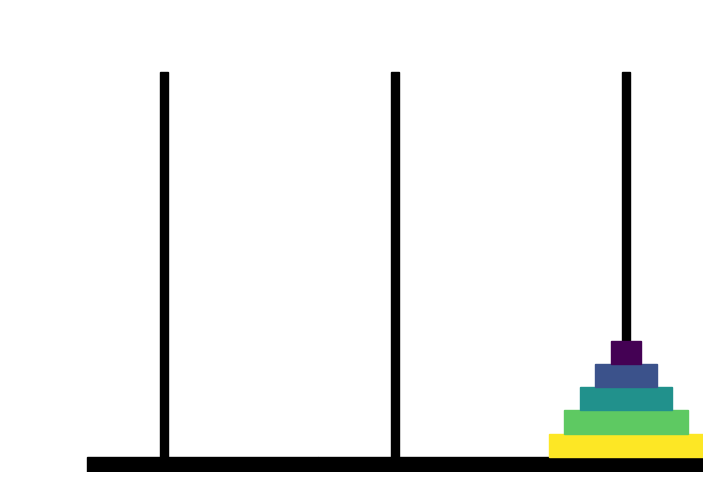

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Função para mover os discos
def hanoi(n, origem, destino, auxiliar):
    if n == 1:
        movimentos.append((origem, destino))
        return
    hanoi(n-1, origem, auxiliar, destino)
    movimentos.append((origem, destino))
    hanoi(n-1, auxiliar, destino, origem)

# Função para desenhar o estado atual das torres
def desenhar_torres(torres):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.clear()
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')

    # Desenhar pinos
    for i in range(3):
        x_base = i * 3
        ax.add_patch(patches.Rectangle((x_base + 1.95, 0.2), 0.1, 5, color='black'))

    # Desenhar base das torres
    for i in range(3):
        x_base = i * 3
        ax.add_patch(patches.Rectangle((x_base + 1, 0), 3, 0.2, color='black'))

    # Desenhar discos
    colors = plt.cm.viridis(np.linspace(0, 1, n))
    for i, torre in enumerate(torres):
        x_base = i * 3
        for j, disco in enumerate(torre):
            largura = 2 * (disco / n)
            ax.add_patch(patches.Rectangle((x_base + 2 - largura/2, 0.2 + j*0.3), largura, 0.3, color=colors[disco-1]))

    plt.pause(0.5)

# Função principal para coletar dados do usuário e resolver o problema
def main():
    global n, movimentos
    movimentos = []

    try:
        n = int(input("Digite o número de discos: "))
        origem = input("Digite a torre de origem (A, B ou C): ").strip().upper()
        destino = input("Digite a torre de destino (A, B ou C): ").strip().upper()

        # Verificação de entradas válidas
        if origem not in ('A', 'B', 'C') or destino not in ('A', 'B', 'C'):
            print("Entradas inválidas. As torres devem ser A, B ou C.")
            return
        if origem == destino:
            print("A torre de origem e a torre de destino devem ser diferentes.")
            return

        auxiliar = {'A', 'B', 'C'}.difference({origem, destino}).pop()

        # Inicializar as torres
        torres = {'A': list(range(n, 0, -1)), 'B': [], 'C': []}

        print(f"Resolvendo Torre de Hanoi com {n} discos:")
        hanoi(n, origem, destino, auxiliar)

        # Desenhar o estado inicial das torres
        plt.ion()
        desenhar_torres([torres['A'], torres['B'], torres['C']])

        # Executar os movimentos e atualizar o gráfico
        for move in movimentos:
            disco = torres[move[0]].pop()
            torres[move[1]].append(disco)
            desenhar_torres([torres['A'], torres['B'], torres['C']])

        plt.ioff()
        plt.show()

    except ValueError:
        print("Por favor, insira um número válido de discos.")

# Executar a função principal
main()
